The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


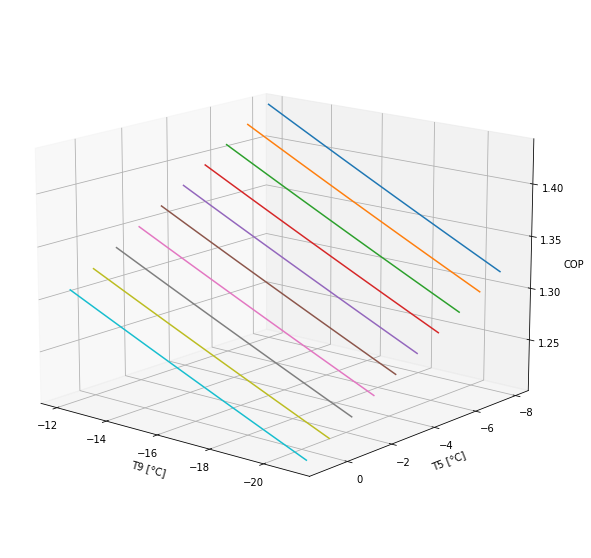

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


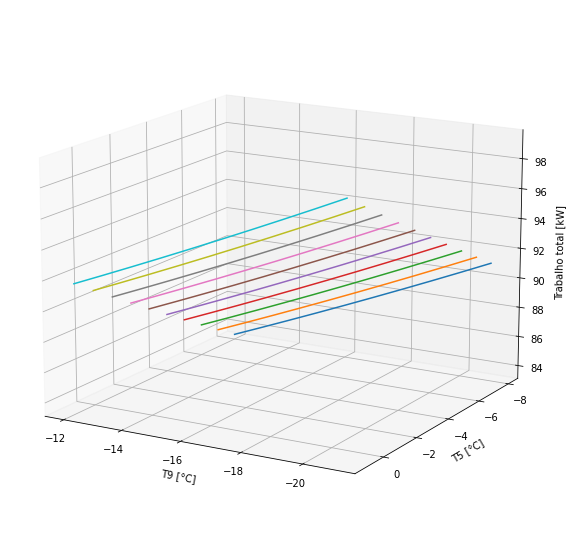

In [14]:
from CoolProp.CoolProp import PropsSI as CP
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

#Listas
T5_lista = []
T9_lista = []
Wcomp_total_lista = []
COP_lista = []
cont = []

#Lista de temperaturas de condensação
for i in range (-21, -11, 1):
    cont.append(i+273.15)

#Dados do problema
Pfrig = 120 * 1000
T1 = -80 + 273.15 #[K]
T11 = 35 + 273.15 #[K]
fluid_high = 'R717'
fluid_low = 'R41'
n = 1.1
drop_suc = 12000 #[Pa]
drop_desc = 24000 #[Pa]

#Pressão crítica do fluido superior
P_crit_high = CP('PCRIT', fluid_high)

#Ciclo inferior
P1 = CP('P', 'T', T1, 'Q', 1, fluid_low)
h1 = CP('H', 'T', T1, 'Q', 1, fluid_low)
ha = h1
Pa = P1 - drop_suc
Ta = CP('T', 'H', ha, 'P', Pa, fluid_low)
Pb = Pa
Tb = Ta + 4 #considerei um superaquecimento de 4°C na admissão
vb = 1 / CP('D', 'T', Tb, 'P', Pb, fluid_low)

#Ciclo superior
P11 = CP('P', 'T', T11, 'Q', 0, fluid_high)
P10 = P11
Pg = P10 + drop_desc
h11 = CP('H', 'T', T11, 'Q', 0, fluid_high)
h12 = h11

#Loop nos dois ciclos - variação das temperaturas de evaporação e condensação
for T5 in range (-8, 2, 1):
    #Ciclo inferior
    T5 = T5 + 273.15
    P5 = CP('P', 'T', T5, 'Q', 0, fluid_low)
    h5 = CP('H', 'T', T5, 'Q', 0, fluid_low)
    h6 = h5
    P4 = P5
    #Pressão intermediária
    P_int =  (P1 * P5) ** 0.5
    P6 = P_int
    P3 = P_int
    P7 = P_int
    P2 = P_int
    h7 = CP('H', 'P', P7, 'Q', 0, fluid_low)
    h8 = h7
    h3 = CP('H', 'P', P3, 'Q', 1, fluid_low)
    #CBP
    Pc = P2 + drop_desc
    vc = (Pb * vb ** n / Pc)**(1 / n)
    hc = CP('H', 'P', Pc, 'D', 1 / vc, fluid_low)
    h2 = hc
    m_CBP = Pfrig / (h1 - h8)
    #Trabalho específico do CBP
    w_CBP = n / (n-1) * Pb * vb * ((Pc/Pb)**((n-1)/n) - 1)
    #Trabalho do CBP
    W_CBP = m_CBP * w_CBP
    #CAP
    hw = h3
    Pw = P3 - drop_suc
    Tw = CP('T', 'H', hw, 'P', Pw, fluid_low)
    Px = Pw
    Tx = Tw + 4 #considerei um superaquecimento de 4°C na admissão
    vx = 1 / CP('D', 'T', Tx, 'P', Px, fluid_low)
    Py = P4 + drop_desc
    vy = (Px * vx ** n / Py)**(1 / n)
    hy = CP('H', 'P', Py, 'D', 1 / vy, fluid_low)
    h4 = hy
    m_CAP = m_CBP * (h2 - h7) / (h3 - h6)
    #Trabalho específico do CAP
    w_CAP = n / (n-1) * Px * vx * ((Py/Px)**((n-1)/n) - 1)
    #Trabalho do CAP
    W_CAP = m_CAP * w_CAP
    #Trabalho total no ciclo inferior
    W_low_total = W_CAP + W_CBP
    #Calor trocado no trocador central
    Qcond_low =  m_CAP * (h4 - h5)
    for T9 in cont:
        #Ciclo superior
        Qevap_high = Qcond_low
        P9 = CP('P', 'T', T9, 'Q', 1, fluid_high)
        h9 = CP('H', 'T', T9, 'Q', 1, fluid_high)
        he = h9
        Pe = P9 - drop_suc
        Te = CP ('T', 'H', he, 'P', Pe, fluid_high)
        Pf = Pe
        Tf = Te + 4 #superaquecimento de 4°C na admissão
        vf = 1 / CP('D', 'T', Tf, 'P', Pf, fluid_high)
        m_flow_high = Qevap_high / (h9 - h12)
        vg = (Pf * vf ** n / Pg)**(1 / n)
        #Verificação da pressão crítica
        if P_crit_high > P10:
            T5_lista.append(T5 - 273.15)
            T9_lista.append(T9 - 273.15)
            #Trabalho específico do compressor do ciclo superior
            w_high = n / (n-1) * Pf * vf * ((Pg/Pf)**((n-1)/n) - 1)
            #Trabalho do compressor do ciclo superior
            Wcomp_high = m_flow_high * w_high
            #Trabalho total
            Wcomp_total = Wcomp_high + W_low_total
            Wcomp_total_lista.append(Wcomp_total / 1000)
            #COP
            COP = Pfrig / Wcomp_total
            COP_lista.append(COP)
        else:
            print ('A pressão P10 = {:0.2f} kPa (T5 = {:0.2f}°C, T9 = {:0.2f}°C) é maior do que a ' 
               'pressão crítica do {} e, por isso, o ponto não foi incluído no gráfico'
                   .format(P10/1000,T5-273.15,T9-273.15,fluid_high))

if len(T5_lista) !=0:
    fig = plt.figure(figsize=[10, 10])
    ax = fig.add_subplot(1, 1, 1, projection ='3d')
    for i in range (0, len(COP_lista), len(cont)):
        x1line = []
        y1line = []
        z1line = []
        for j in range (i, i + len(cont), 1):
            y1line.append(T5_lista[i])
            x1line.append(T9_lista[j])
            z1line.append (COP_lista[j])
        ax.set_xlabel('T9 [°C]', size = 10)
        ax.set_ylabel('T5 [°C]', size = 10)
        ax.set_zlabel('COP', size = 10)
        ax.view_init(15, 130)
        ax.plot3D(x1line, y1line, z1line)
    plt.savefig('cs2flashinferiortrocador.eps', format='eps', bbox_inches = 'tight')  
    plt.show()
else:
    print ('Todos os pontos são inválidos')
    
if len(T5_lista) !=0:
    fig = plt.figure(figsize=[10, 10])
    ax = fig.add_subplot(1, 1, 1, projection ='3d')
    for i in range (0, len(Wcomp_total_lista), len(cont)):
        x1line = []
        y1line = []
        z1line = []
        for j in range (i, i + len(cont), 1):
            y1line.append(T5_lista[i])
            x1line.append(T9_lista[j])
            z1line.append (Wcomp_total_lista[j])
        ax.set_xlabel('T9 [°C]', size = 10)
        ax.set_ylabel('T5 [°C]', size = 10)
        ax.set_zlabel('Trabalho total [kW]', size = 10)
        ax.view_init(15, 120)
        ax.plot3D(x1line, y1line, z1line)
    plt.savefig('cs2flashinferiortrocador.eps', format='eps', bbox_inches = 'tight')  
    plt.show()
else:
    print ('Todos os pontos são inválidos')